<a href="https://colab.research.google.com/github/indra622/AIAcademy_SpeechRecognition/blob/main/Multi_AI_Agent_Study/Part2_Ch2_04_data_visualization_agent_with_Autogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pyautogen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 523.1/523.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.3 MB/s eta 0:00:00


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

In [3]:
import autogen
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

config_list = [{"model": "gpt-4o-mini", "api_key": os.environ["OPENAI_API_KEY"]}]
llm_config = {"config_list": config_list}


Patching name='__init__', member=<function LLMLingua.__init__ at 0x78aa2291d940>, patched=<function function.__call__ at 0x78aa2291d8a0>
Patching name='compress_text', member=<function LLMLingua.compress_text at 0x78aa2291d9e0>, patched=<function function.__call__ at 0x78aa2291dc60>


In [4]:
from autogen.coding import LocalCommandLineCodeExecutor

user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        "executor": LocalCommandLineCodeExecutor(work_dir="group_chat"),
    },
    human_input_mode="NEVER",
)

coder = autogen.AssistantAgent(
    name="coder",
    llm_config=llm_config,
)

critic = autogen.AssistantAgent(
    name="Critic",
    system_message="""비평가.
    명확한 근거를 제시하면서 1(나쁨) - 10(좋음)의 점수를 제공하여 주어진 시각화 코드의 품질을 평가하는 데 고도로 숙련된 조력자입니다.
    각 평가에 대해 시각화 모범 사례를 고려해야 합니다. 구체적으로 다음 차원에서 코드를 신중하게 파악할 수 있습니다.
    - 버그(버그): 버그, 구문 오류 또는 오타가 있나요? 코드가 컴파일되지 않는 이유는 무엇인가요? 어떻게 수정해야 하나요?
    버그가 있는 경우 버그 점수는 반드시 5점 미만이어야 합니다.
    - 데이터 변환(변환): 데이터가 시각화 유형에 맞게 적절하게 변환되었나요?
    예를 들어, 필요한 경우 데이터 집합이 적절하게 필터링, 집계 또는 그룹화되었는가? 날짜 필드를 사용하는 경우, 날짜 필드가 먼저 날짜 개체 등으로 변환되었는가?
    - 목표 준수(규정 준수): 코드가 지정된 비주얼리제이션 목표를 얼마나 잘 충족합니까?
    - 시각화 유형(유형): 모범 사례를 고려할 때 시각화 유형이 데이터 및 의도에 적합한가?
    인사이트를 전달하는 데 더 효과적인 시각화 유형이 있는가? 다른 시각화 유형이 더 적절하다면 점수는 반드시 5점 미만이어야 합니다.
    - 데이터 인코딩(인코딩): 데이터가 시각화 유형에 맞게 적절하게 인코딩되어 있습니까?
    - 미학(심미성): 시각화의 미학이 시각화 유형 및 데이터에 적합한가?

    위의 각 차원에 대해 점수를 제공해야 합니다.
    {bugs: 0, 변환: 0, 규정 준수: 0, type: 0, encoding: 0, 미학: 0}
    코드를 제안하지 마세요.
    마지막으로 위의 비평을 바탕으로 코더가 코드를 개선하기 위해 취해야 할 구체적인 조치 목록을 제안하세요.
    """,
    llm_config=llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)


In [5]:
user_proxy.initiate_chat(
    manager,
    message="""다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고,
    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요.
    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.
    """,
)
# type exit to terminate the chat

User_proxy (to chat_manager):

다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고, 
    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요. 
    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.
    

--------------------------------------------------------------------------------

Next speaker: coder

coder (to chat_manager):

먼저, 주어진 URL에서 데이터를 다운로드하고, 데이터셋의 열을 출력하는 코드를 작성하겠습니다. 그 후에, 'age'와 'pclass' 간의 관계를 차트로 생성하고 해당 차트를 파일로 저장하도록 하겠습니다.

1. 주어진 URL에서 CSV 파일을 다운로드합니다.
2. 데이터셋을 읽어 열을 출력합니다.
3. 'age'와 'pclass'의 관계를 차트로 시각화합니다.
4. 차트를 파일로 저장합니다.

아래의 코드를 사용하여 작업을 수행하겠습니다.

```python
# filename: process_titanic_data.py
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset from the URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Step 2: Print the columns of the dataset
print("Columns in the dataset:")
print(titanic_data.columns)

# Step 3: Create a chart showing the rela

ChatResult(chat_id=None, chat_history=[{'content': '다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고, \n    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요. \n    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.\n    ', 'role': 'assistant', 'name': 'User_proxy'}, {'content': '먼저, 주어진 URL에서 데이터를 다운로드하고, 데이터셋의 열을 출력하는 코드를 작성하겠습니다. 그 후에, \'age\'와 \'pclass\' 간의 관계를 차트로 생성하고 해당 차트를 파일로 저장하도록 하겠습니다.\n\n1. 주어진 URL에서 CSV 파일을 다운로드합니다.\n2. 데이터셋을 읽어 열을 출력합니다.\n3. \'age\'와 \'pclass\'의 관계를 차트로 시각화합니다.\n4. 차트를 파일로 저장합니다.\n\n아래의 코드를 사용하여 작업을 수행하겠습니다.\n\n```python\n# filename: process_titanic_data.py\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# Step 1: Load the dataset from the URL\nurl = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"\ntitanic_data = pd.read_csv(url)\n\n# Step 2: Print the columns of the dataset\nprint("Columns in the dataset:")\nprint(titanic_data.columns)\n\n# Step 3: Create a chart showing the relationship between 

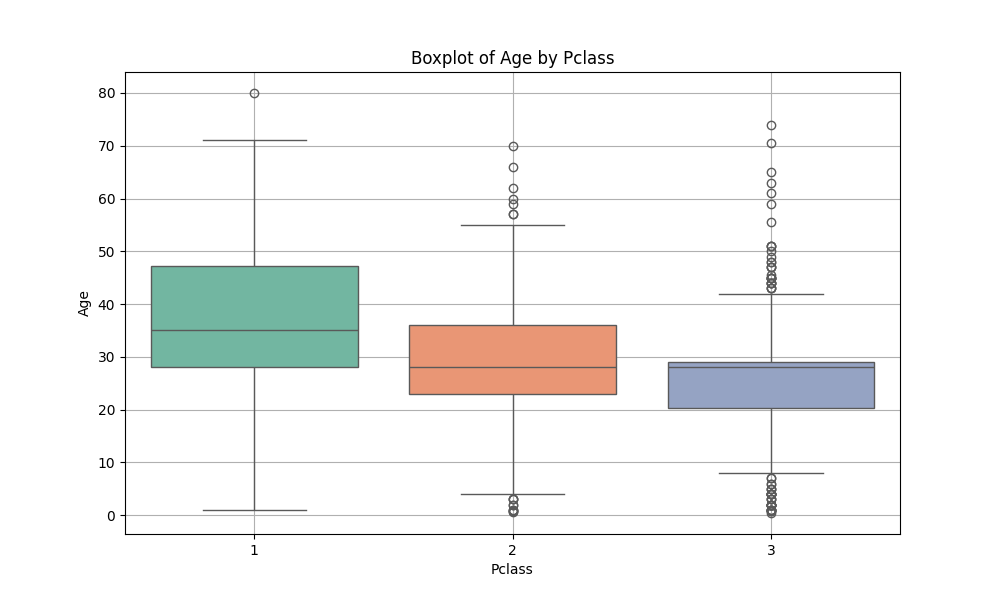

In [7]:
Image(filename="group_chat/age_vs_pclass_boxplot.png")